In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import os

# Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /Users/olaoluwatunmise/.cache/kagglehub/datasets/jainilcoder/online-payment-fraud-detection/versions/1


# Check Available Files

In [2]:


data_path = "/Users/olaoluwatunmise/.cache/kagglehub/datasets/jainilcoder/online-payment-fraud-detection/versions/1"

print(os.listdir(data_path))


['onlinefraud.csv']


In [3]:


df = pd.read_csv(f"{data_path}/onlinefraud.csv")

# Check the first 5 rows
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Optimize Data Types
df['type'] = df['type'].astype('category')
df['nameOrig'] = df['nameOrig'].astype('category')
df['nameDest'] = df['nameDest'].astype('category')

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
#df[df['isFraud'] == 1].describe()
df[df['isFraud'] == 0].describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0,6354407.0
mean,2.432357e+02,1.781970e+05,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06,0.0,0.0
std,1.421402e+02,5.962370e+05,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06,0.0,0.0
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.560000e+02,1.336840e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,2.390000e+02,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05,0.0,0.0
75%,3.340000e+02,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06,0.0,0.0
max,7.180000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0,0.0


# Categorical Feature Analysis

####   Analyze transaction type

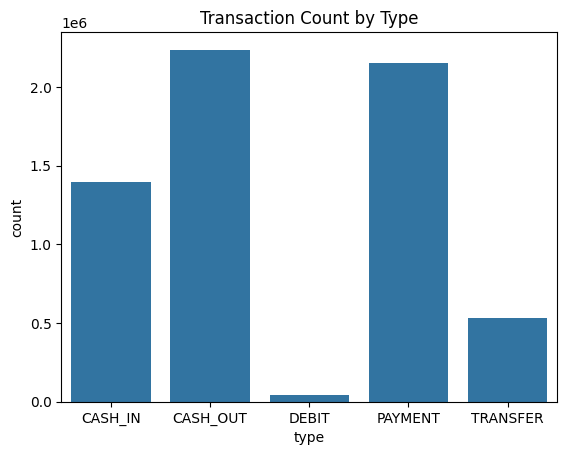

In [8]:
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df)
plt.title("Transaction Count by Type")
plt.show()


#### Checking how fraud is distributed across types:

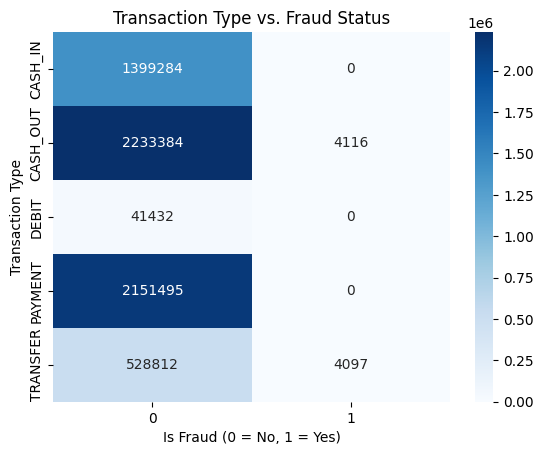

In [9]:
# Create crosstab
ct = pd.crosstab(df['type'], df['isFraud'])

# Plot heatmap
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title("Transaction Type vs. Fraud Status")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Type")
plt.show()


# Transaction Amount Analysis

#### Checking for anomalies in amount

Text(0, 0.5, 'Frequency')

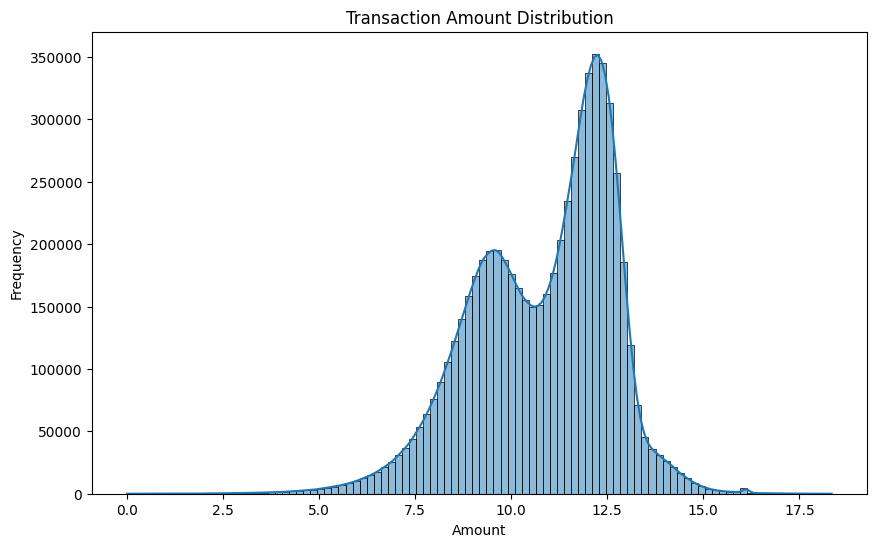

In [10]:
import numpy as np

# Log-transform (due to extreme values)

plt.figure(figsize=(10,6))
df['log_amount'] = np.log1p(df['amount'])
sns.histplot(df['log_amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')


<Axes: xlabel='isFraud', ylabel='amount'>

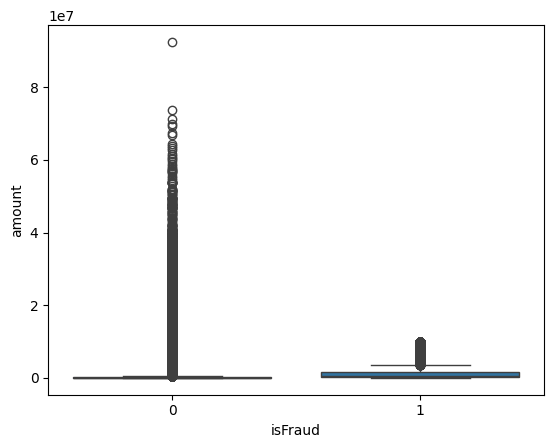

In [11]:
sns.boxplot(x='isFraud', y='amount', data=df)


#### Time Analysis (Step Features)

step represents time in hours (1 to 744).

Text(0, 0.5, 'Transaction Count')

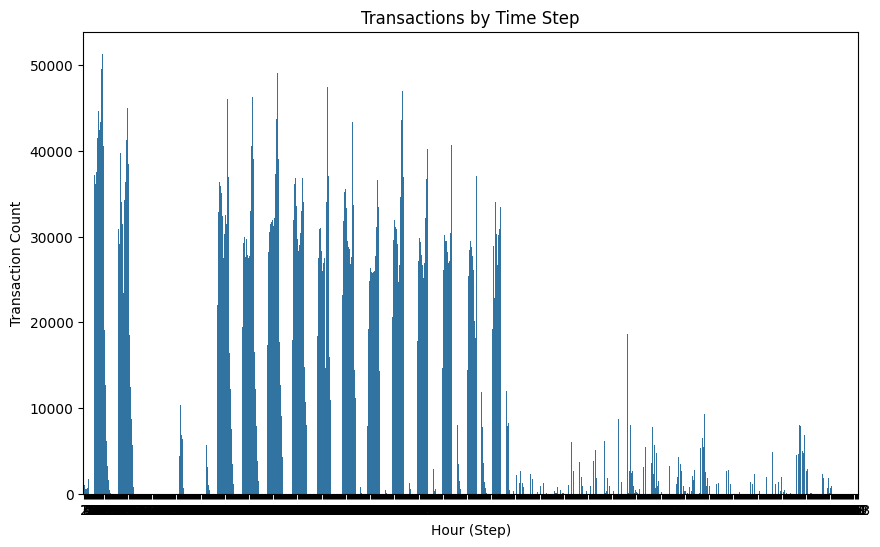

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='step', data=df)
plt.title('Transactions by Time Step')
plt.xlabel('Hour (Step)')
plt.ylabel('Transaction Count')


#### Compare Fraud vs. Non-Fraud



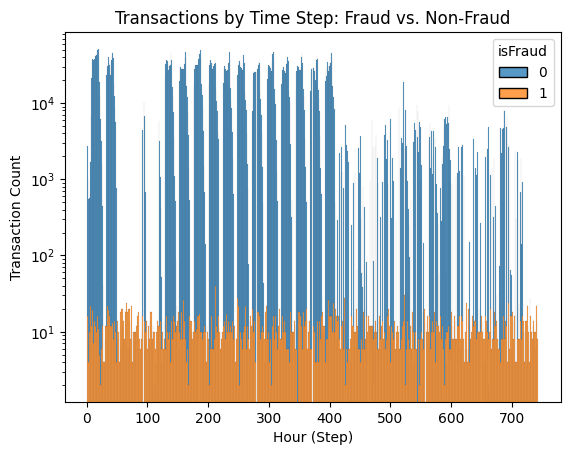

In [13]:
sns.histplot(data=df, x='step', hue='isFraud', bins=750, multiple='stack')
plt.title("Transactions by Time Step: Fraud vs. Non-Fraud")
plt.xlabel("Hour (Step)")
plt.ylabel("Transaction Count")
plt.yscale('log')  # Log scale due to imbalance
plt.show()

#### Transaction Type

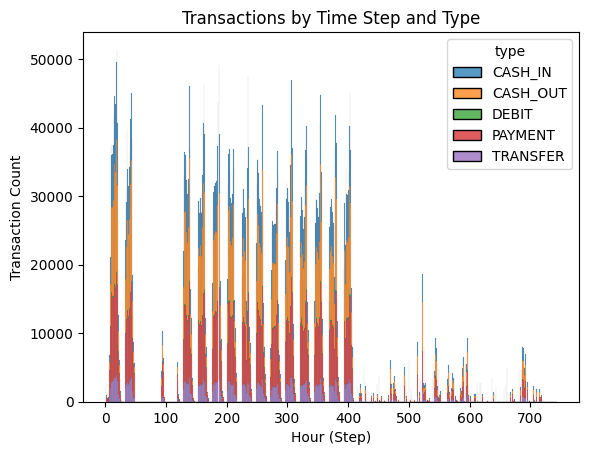

In [14]:
sns.histplot(data=df, x='step', hue='type', bins=750, multiple='stack')
plt.title("Transactions by Time Step and Type")
plt.xlabel("Hour (Step)")
plt.ylabel("Transaction Count")
plt.show()

#### Understand temporal fraud patterns

Text(0.5, 1.0, 'Temporal Fraud Pattern')

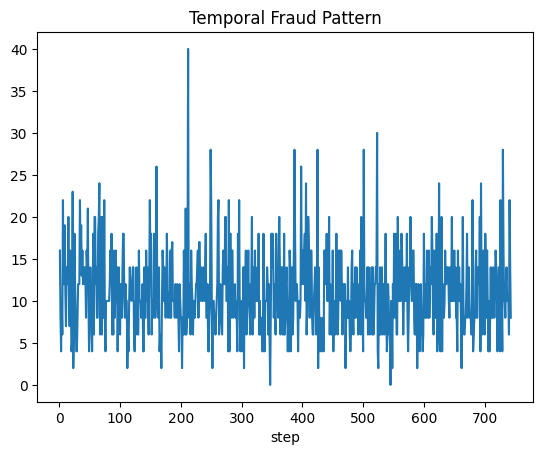

In [15]:


df.groupby('step')['isFraud'].sum().plot()
plt.title("Temporal Fraud Pattern")


### Fraud Occurrence Distribution

Text(0.5, 1.0, 'Fraud vs Non-Fraud Distribution')

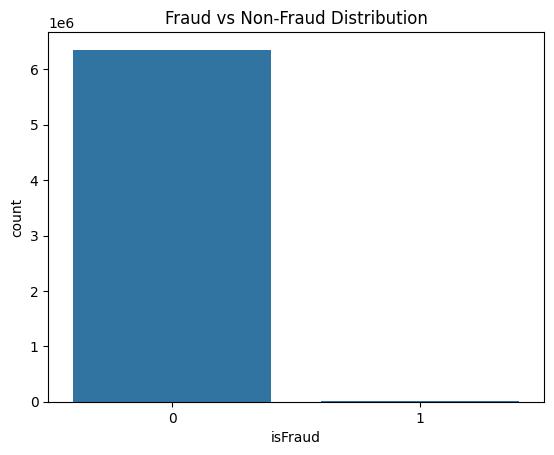

In [16]:
df['isFraud'].value_counts(normalize=True) * 100
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Distribution')


# Investigate Fraud in Low-Volume Periods

From the "Transactions by Time Step" plot, we observed that transaction volume drops significantly after step 400, yet the "Temporal Fraud Pattern" plot showed that fraud still occurs in these low-volume periods. Let’s investigate these fraudulent transactions to identify patterns that could help your model.






In [17]:
# Filter for fraudulent transactions after step 400
low_volume_fraud = df[(df['step'] > 400) & (df['isFraud'] == 1)]

# Display key columns to identify patterns
print(low_volume_fraud[['step', 'type', 'amount', 'nameOrig', 'nameDest', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])

# Summarize by transaction type
print("\nFraud by Transaction Type in Low-Volume Periods:")
print(low_volume_fraud['type'].value_counts())

# Summarize amount statistics
print("\nAmount Statistics for Fraud in Low-Volume Periods:")
print(low_volume_fraud['amount'].describe())

         step      type      amount     nameOrig     nameDest  oldbalanceOrg  \
5791128   401  TRANSFER   125822.44   C675569506   C631063987      125822.44   
5791129   401  CASH_OUT   125822.44     C8451222  C1787543142      125822.44   
5791496   401  TRANSFER  1806516.34  C1882943298   C478491777     1806516.34   
5791497   401  CASH_OUT  1806516.34  C1142691202  C1363990077     1806516.34   
5791801   401  TRANSFER  4481768.26  C2074526030  C1133721990     4481768.26   
...       ...       ...         ...          ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425   C776919290      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245  C1881841831     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333  C1365125890     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037  C2080388513      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807   C873221189      850002.52   

         newbalanceOrig  oldbalanceDest

#### Amount Features:
Since fraudulent amounts are often large in low-volume periods, create a feature to capture this:



In [18]:
# Log-transform amount to reduce skewness
import numpy as np
df['log_amount'] = np.log1p(df['amount'])

# Indicator for large amounts (e.g., above the 75th percentile of fraud amounts)
df['is_large_amount'] = (df['amount'] > 1518008).astype(int)  # 75th percentile from fraud stats

#### TRANSFER-CASH_OUT History Indicator:

Since fraud often involves a TRANSFER followed by a CASH_OUT of the same amount, create a feature to detect this pattern:

This feature will be 1 for transactions that are part of a TRANSFER-CASH_OUT pair with the same amount, which is a strong fraud signal.


In [19]:
# Sort by step to ensure sequential transactions are adjacent
df = df.sort_values(by=['step', 'amount'])

# Check if a TRANSFER is followed by a CASH_OUT with the same amount
df['is_transfer_cashout_pair'] = 0
for i in range(len(df) - 1):
    if (df.iloc[i]['type'] == 'TRANSFER' and 
        df.iloc[i + 1]['type'] == 'CASH_OUT' and 
        df.iloc[i]['amount'] == df.iloc[i + 1]['amount'] and 
        df.iloc[i]['step'] == df.iloc[i + 1]['step']):
        df.iloc[i, df.columns.get_loc('is_transfer_cashout_pair')] = 1
        df.iloc[i + 1, df.columns.get_loc('is_transfer_cashout_pair')] = 1

In [20]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,log_amount,is_large_amount,is_transfer_cashout_pair
2070,1,PAYMENT,6.42,C1921012072,18462.78,18456.36,M884604029,0.0,0.0,0,0,2.004179,0,0
2450,1,PAYMENT,6.93,C730584984,68267.00,68260.07,M1276666395,0.0,0.0,0,0,2.070653,0,0
125,1,PAYMENT,8.73,C38603201,81313.00,81304.27,M1422273905,0.0,0.0,0,0,2.275214,0,0
2447,1,PAYMENT,13.54,C1172417096,16743.76,16730.22,M314966354,0.0,0.0,0,0,2.676903,0,0
753,1,PAYMENT,15.06,C1730337646,204682.00,204666.94,M418513504,0.0,0.0,0,0,2.776332,0,0


# Encoding 

Since nameOrig and nameDest in your dataset are high-cardinality categorical features (with nameOrig having over 1 million unique values and nameDest likely having a similar number), we need to encode them in a way that reduces dimensionality while preserving useful information for your payment fraud detection ML project. Based on the discussion in the previous response, I’ll implement frequency encoding for both columns, as it’s a simple and effective method for high-cardinality features. I’ll also add a derived feature for nameDest to indicate whether the destination is a merchant (starts with M) or a customer (starts with C), since this distinction might be relevant for fraud detection.



In [21]:
# One-hot encode the 'type' columns
df = pd.get_dummies(df, columns=['type'], prefix='type')


# View the result
print(df.head())



      step  amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
2070     1    6.42  C1921012072       18462.78        18456.36   M884604029   
2450     1    6.93   C730584984       68267.00        68260.07  M1276666395   
125      1    8.73    C38603201       81313.00        81304.27  M1422273905   
2447     1   13.54  C1172417096       16743.76        16730.22   M314966354   
753      1   15.06  C1730337646      204682.00       204666.94   M418513504   

      oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  log_amount  \
2070             0.0             0.0        0               0    2.004179   
2450             0.0             0.0        0               0    2.070653   
125              0.0             0.0        0               0    2.275214   
2447             0.0             0.0        0               0    2.676903   
753              0.0             0.0        0               0    2.776332   

      is_large_amount  is_transfer_cashout_pair  type_CASH_IN 

In [22]:
# Calculate frequency of each nameOrig
name_orig_freq = df['nameOrig'].value_counts()

# Map frequencies to the nameOrig column
df['nameOrig_freq'] = df['nameOrig'].map(name_orig_freq)

# Check the result
print("Sample of nameOrig_freq:")
print(df[['nameOrig_freq']].head(n=10))

Sample of nameOrig_freq:
      nameOrig_freq
2070              1
2450              1
125               1
2447              1
753               1
1186              1
130               1
1695              1
56                1
1633              1


In [23]:
# Calculate frequency of each nameDest
name_dest_freq = df['nameDest'].value_counts()

# Map frequencies to the nameDest column
df['nameDest_freq'] = df['nameDest'].map(name_dest_freq)



In [24]:
# Create a binary feature: 1 if destination is a merchant (starts with 'M'), 0 otherwise
df['is_dest_merchant'] = df['nameDest'].str.startswith('M').astype(int)

# # Drop the original nameDest column
# df = df.drop(columns=['nameDest'])
# # Drop the original nameOrig column
# df = df.drop(columns=['nameOrig'])


# Check the result
print("Sample of encoded features:")
print(df[['nameOrig_freq', 'nameDest_freq', 'is_dest_merchant']].head())

Sample of encoded features:
      nameOrig_freq  nameDest_freq  is_dest_merchant
2070              1              1                 1
2450              1              1                 1
125               1              1                 1
2447              1              1                 1
753               1              1                 1


In [25]:
print("Correlations with isFraud:")
print(df[['nameOrig_freq', 'nameDest_freq', 'is_dest_merchant', 'isFraud']].corr())

Correlations with isFraud:
                  nameOrig_freq  nameDest_freq  is_dest_merchant   isFraud
nameOrig_freq          1.000000       0.000181          0.000126  0.000316
nameDest_freq          0.000181       1.000000         -0.587673 -0.008982
is_dest_merchant       0.000126      -0.587673          1.000000 -0.025697
isFraud                0.000316      -0.008982         -0.025697  1.000000


# Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

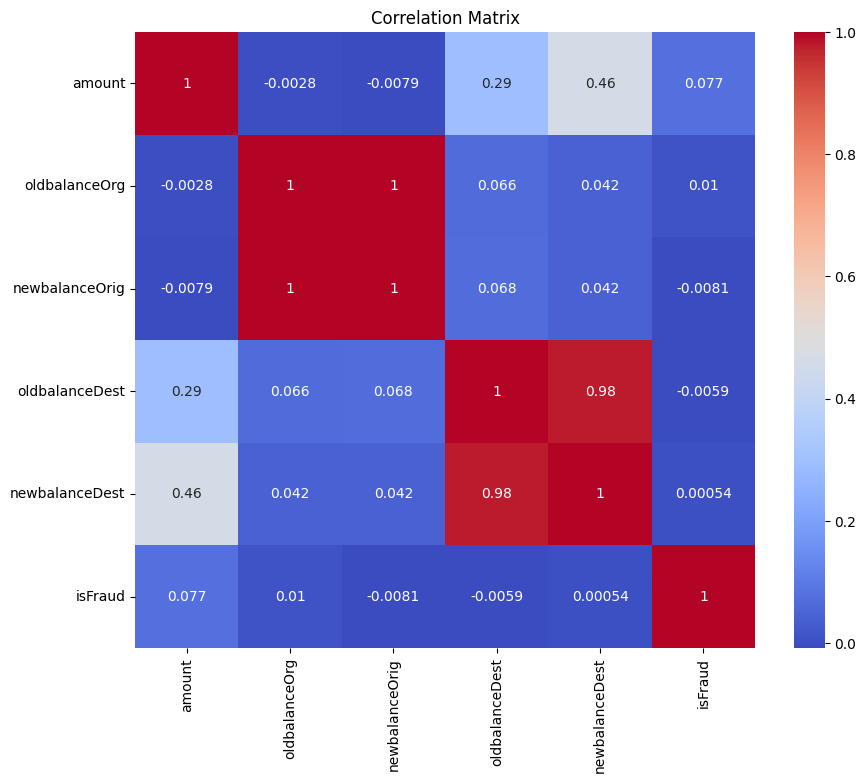

In [26]:
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')


# Feature Engineering

# Account Balance Analysis

#### Studying Sender & Receiver Behaviour

In [27]:
df['balanceChangeOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']


#### Balance Discrepancies

These capture inconsistencies in balance updates, which might be more common in fraud.



In [28]:
df['orig_balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['dest_balance_diff'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']

#### Ratio of Frequencies

- Ratio of user transaction frequency to average frequency
- Helps detect abnormal activity frequency too frequent or rare



In [29]:
df['freq_ratio'] = df['nameOrig_freq'] / df['nameDest_freq']

#### Interaction with is_dest_merchant



In [30]:
df['dest_freq_is_merchant'] = df['nameDest_freq'] * df['is_dest_merchant']

#### Transaction Density:

- Number of transactions happening in the dataset (for that time step/window)

- High density in certain windows can indicate attacks or bot activity.

In [31]:

# Rolling count of transactions in the last 10 steps
df['transaction_density'] = df.groupby('step')['step'].transform('count')
# Alternatively, use a rolling window (if step is sequential)
df['rolling_transaction_count'] = df['step'].rolling(window=10, min_periods=1).count()


#### Fraud-to-Transaction Ratio

- Ratio of fraudulent transactions to total for a user or time window

- Higher ratio = Higher likelihood of fraud.

In [32]:
# Fraud count per step
fraud_per_step = df[df['isFraud'] == 1].groupby('step').size().reindex(df['step'].unique(), fill_value=0)
total_per_step = df.groupby('step').size()
fraud_ratio = (fraud_per_step / total_per_step).fillna(0)
df['fraud_ratio'] = df['step'].map(fraud_ratio)



#### Time-Based Features

If step represents hours, extract features like hour of day or day of week (assuming 24 steps = 1 day).

This feature gives insights into whether transactions occur during certain times of day, which may reveal fraudulent patterns (e.g., fraud happening more at night)

In [33]:
df['hour_of_day'] = df['step'] % 24
df['day'] = (df['step'] // 24).astype(int)

#### Indicator for Drained Originating Account

This will be 1 for transactions where the originating account is drained, which is a strong fraud indicator in this data.



In [34]:
epsilon = 1e-3  # Tolerance for floating-point precision
df['is_orig_drained'] = (
    (df['newbalanceOrig'] < epsilon) & 
    (abs(df['oldbalanceOrg'] - df['amount']) < epsilon)
).astype(int)



#### isLowAmount

- Flags transactions below the 1st percentile,
- Make it adaptive based on the sender's usual activity
- This way, it’s not just globally low — it’s unusual for that sender, which might be even more useful for fraud detection

In [35]:
# compare with sender's median transaction
# For median aggregation
df['sender_median'] = df.groupby('nameOrig', observed=False)['amount'].transform('median')
df['isLowAmount'] = (df['amount'] < 0.1 * df['sender_median']).astype(int)


#### isHighAmount → Transactions above the 99th percentile

This feature will flag transactions where the amount is higher than 99% of the transaction amounts in the dataset. High-value transactions may be indicative of fraud.

In [36]:
# Calculate the 99th percentile of the 'amount' column
high_amount_threshold = df['amount'].quantile(0.99)

# Create the 'isHighAmount' feature
df['isHighAmount'] = (df['amount'] > high_amount_threshold).astype(int)


In [37]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,...,dest_freq_is_merchant,transaction_density,rolling_transaction_count,fraud_ratio,hour_of_day,day,is_orig_drained,sender_median,isLowAmount,isHighAmount
2070,1,6.42,C1921012072,18462.78,18456.36,M884604029,0.0,0.0,0,0,...,1,2708,1.0,0.005908,1,0,0,6.42,0,0
2450,1,6.93,C730584984,68267.00,68260.07,M1276666395,0.0,0.0,0,0,...,1,2708,2.0,0.005908,1,0,0,6.93,0,0
125,1,8.73,C38603201,81313.00,81304.27,M1422273905,0.0,0.0,0,0,...,1,2708,3.0,0.005908,1,0,0,8.73,0,0
2447,1,13.54,C1172417096,16743.76,16730.22,M314966354,0.0,0.0,0,0,...,1,2708,4.0,0.005908,1,0,0,13.54,0,0
753,1,15.06,C1730337646,204682.00,204666.94,M418513504,0.0,0.0,0,0,...,1,2708,5.0,0.005908,1,0,0,15.06,0,0


In [38]:
df.columns.to_list()

['step',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud',
 'log_amount',
 'is_large_amount',
 'is_transfer_cashout_pair',
 'type_CASH_IN',
 'type_CASH_OUT',
 'type_DEBIT',
 'type_PAYMENT',
 'type_TRANSFER',
 'nameOrig_freq',
 'nameDest_freq',
 'is_dest_merchant',
 'balanceChangeOrig',
 'balanceChangeDest',
 'orig_balance_diff',
 'dest_balance_diff',
 'freq_ratio',
 'dest_freq_is_merchant',
 'transaction_density',
 'rolling_transaction_count',
 'fraud_ratio',
 'hour_of_day',
 'day',
 'is_orig_drained',
 'sender_median',
 'isLowAmount',
 'isHighAmount']

# Find The Correlation of the New Features 

Correlation of features with isFraud:
step                         0.031578
amount                       0.076688
oldbalanceOrg                0.010154
newbalanceOrig              -0.008148
oldbalanceDest              -0.005885
newbalanceDest               0.000535
isFlaggedFraud               0.044109
orig_balance_diff            0.011283
dest_balance_diff           -0.055120
freq_ratio                   0.001772
dest_freq_is_merchant       -0.025677
transaction_density         -0.065083
rolling_transaction_count    0.000038
fraud_ratio                  0.670319
hour_of_day                 -0.031403
day                          0.032577
is_orig_drained              0.988412
isHighAmount                 0.083010
isLowAmount                 -0.000703
is_transfer_cashout_pair     0.991775
Name: isFraud, dtype: float64


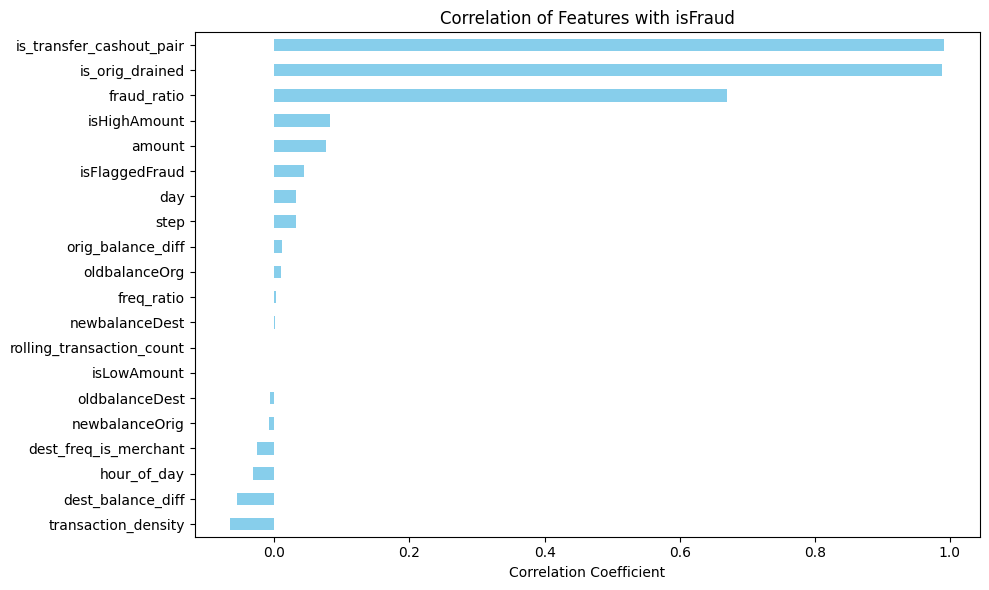

In [39]:
# List of features (excluding non-numeric or irrelevant columns like nameOrig, nameDest)
features = [
    'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 
    'newbalanceDest', 'isFlaggedFraud', 'orig_balance_diff', 'dest_balance_diff', 
    'freq_ratio', 'dest_freq_is_merchant', 'transaction_density', 
    'rolling_transaction_count', 'fraud_ratio', 'hour_of_day', 'day', 
    'is_orig_drained', 'isHighAmount', 'isLowAmount' , 'is_transfer_cashout_pair'
]

# Calculate correlation with isFraud
correlations = df[features + ['isFraud']].corr()['isFraud'].drop('isFraud')

# Display correlations
print("Correlation of features with isFraud:")
print(correlations)

# Optional: Visualize correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with isFraud')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [40]:


# Load your dataset (replace with your actual data path)
# df = pd.read_csv('your_data.csv')

# Filter numeric columns only (correlation requires numeric data)
numeric_features = [
    'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
    'newbalanceDest', 'log_amount', 'is_large_amount', 'is_transfer_cashout_pair',
    'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
    'nameOrig_freq', 'nameDest_freq', 'is_dest_merchant', 'balanceChangeOrig',
    'balanceChangeDest', 'orig_balance_diff', 'dest_balance_diff', 'freq_ratio',
    'dest_freq_is_merchant', 'transaction_density', 'rolling_transaction_count',
    'fraud_ratio', 'hour_of_day', 'day', 'is_orig_drained', 'isFraud','isHighAmount',
    'isLowAmount'
]

# Filter numeric columns
df_numeric = df[numeric_features]

# Compute correlation with 'isFraud'
correlation_with_fraud = df_numeric.corr()[['isFraud']].sort_values(
    by='isFraud', ascending=False
)

# Display results
print("Correlation of features with isFraud:")
print(correlation_with_fraud)

Correlation of features with isFraud:
                            isFraud
isFraud                    1.000000
is_transfer_cashout_pair   0.991775
is_orig_drained            0.988412
fraud_ratio                0.670319
balanceChangeOrig          0.362472
isHighAmount               0.083010
is_large_amount            0.082045
amount                     0.076688
type_TRANSFER              0.053869
log_amount                 0.040640
day                        0.032577
step                       0.031578
balanceChangeDest          0.027028
orig_balance_diff          0.011283
type_CASH_OUT              0.011256
oldbalanceOrg              0.010154
freq_ratio                 0.001772
newbalanceDest             0.000535
nameOrig_freq              0.000316
rolling_transaction_count  0.000038
isLowAmount               -0.000703
type_DEBIT                -0.002911
oldbalanceDest            -0.005885
newbalanceOrig            -0.008148
nameDest_freq             -0.008982
type_CASH_IN              

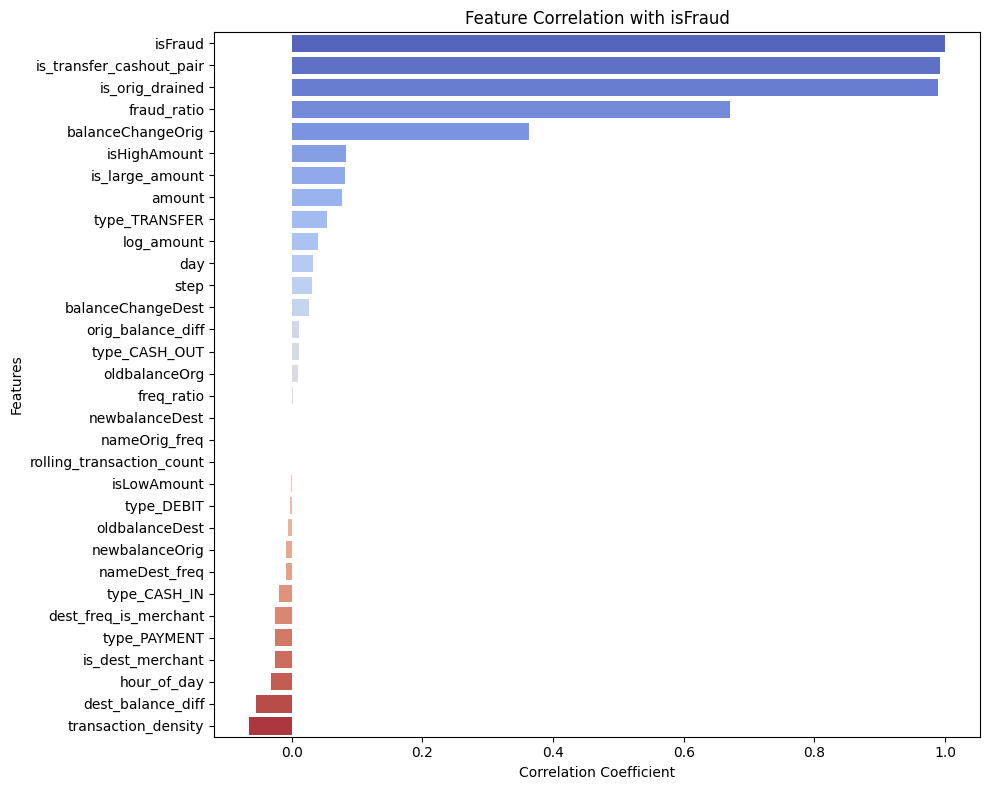

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlations (corrected to avoid FutureWarning)
plt.figure(figsize=(10, 8))
sns.barplot(
    x=correlation_with_fraud['isFraud'],  # Correlation values
    y=correlation_with_fraud.index,       # Feature names
    hue=correlation_with_fraud.index,     # Assign y to hue to color bars by feature
    palette="coolwarm",                  # Color scheme
    legend=False                         # Disable legend
)
plt.title('Feature Correlation with isFraud')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

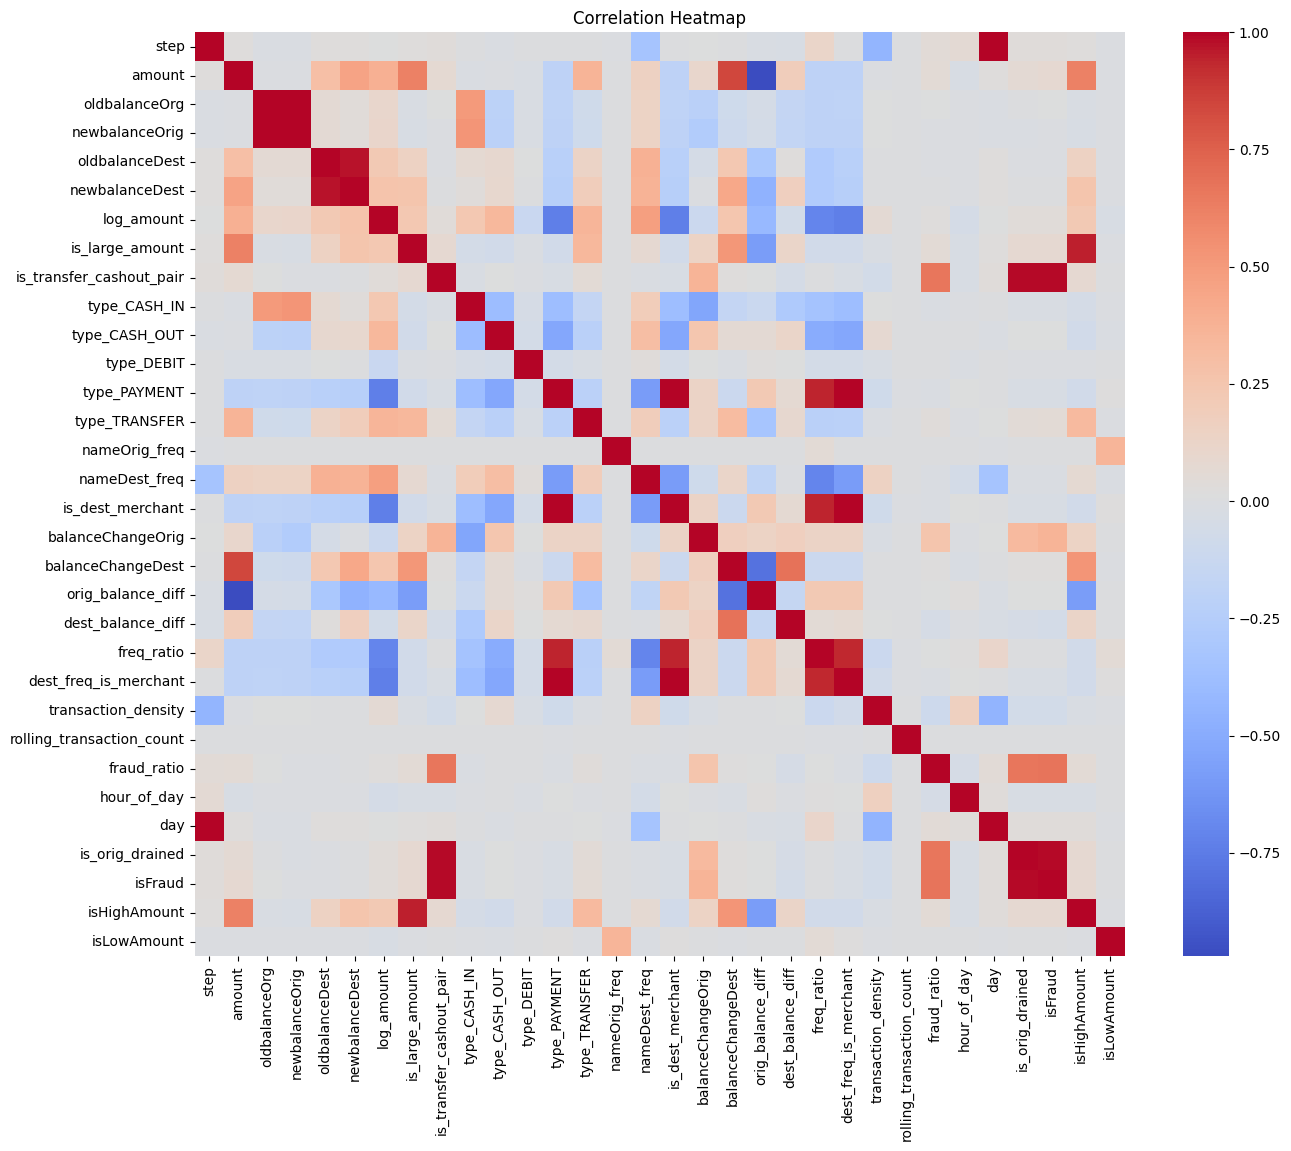

In [42]:
plt.figure(figsize=(15,12))
sns.heatmap(df_numeric.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title('Correlation Heatmap')
plt.show()


# Feature Selection

In [43]:
selected_features = ['is_orig_drained','is_transfer_cashout_pair','fraud_ratio','balanceChangeOrig','amount', 
                     'type_TRANSFER', 'isFlaggedFraud', 'orig_balance_diff', 'day', 'newbalanceOrig','oldbalanceOrg', 'step', 
                     'transaction_density','hour_of_day', 'rolling_transaction_count', 'freq_ratio',
                     'type_CASH_OUT','is_dest_merchant', 'isHighAmount', 'isLowAmount'
                    
                     ]

df_select = df[selected_features + ['isFraud']]

df_select.head(n=10)

,is_orig_drained,is_transfer_cashout_pair,fraud_ratio,balanceChangeOrig,amount,type_TRANSFER,isFlaggedFraud,orig_balance_diff,day,newbalanceOrig,...,step,transaction_density,hour_of_day,rolling_transaction_count,freq_ratio,type_CASH_OUT,is_dest_merchant,isHighAmount,isLowAmount,isFraud
2070,0,0,0.005908,6.42,6.42,False,0,-1.746159e-12,0,18456.36,...,1,2708,1,1.0,1.0,False,1,0,0,0
2450,0,0,0.005908,6.93,6.93,False,0,-6.984635e-12,0,68260.07,...,1,2708,1,2.0,1.0,False,1,0,0,0
125,0,0,0.005908,8.73,8.73,False,0,-4.074963e-12,0,81304.27,...,1,2708,1,3.0,1.0,False,1,0,0,0
2447,0,0,0.005908,13.54,13.54,False,0,-2.764011e-12,0,16730.22,...,1,2708,1,4.0,1.0,False,1,0,0,0
753,0,0,0.005908,15.06,15.06,False,0,-2.328804e-12,0,204666.94,...,1,2708,1,5.0,1.0,False,1,0,0,0
1186,0,0,0.005908,23.31,23.31,False,0,-2.327027e-12,0,45336.69,...,1,2708,1,6.0,1.0,False,1,0,0,0
130,0,0,0.005908,25.12,25.12,False,0,2.618350e-12,0,61637.88,...,1,2708,1,7.0,1.0,False,1,0,0,0
1695,0,0,0.005908,27.56,27.55,False,0,1.000000e-02,0,6833.58,...,1,2708,1,8.0,1.0,False,1,0,0,0
56,0,0,0.005908,38.66,38.66,False,0,-1.421085e-13,0,16135.34,...,1,2708,1,9.0,1.0,False,1,0,0,0
1633,0,0,0.005908,0.00,42.00,False,0,-4.200000e+01,0,0.00,...,1,2708,1,10.0,1.0,False,1,0,0,0


In [44]:
df_select.dtypes

is_orig_drained                int64
is_transfer_cashout_pair       int64
fraud_ratio                  float64
balanceChangeOrig            float64
amount                       float64
type_TRANSFER                   bool
isFlaggedFraud                 int64
orig_balance_diff            float64
day                            int64
newbalanceOrig               float64
oldbalanceOrg                float64
step                           int64
transaction_density            int64
hour_of_day                    int64
rolling_transaction_count    float64
freq_ratio                   float64
type_CASH_OUT                   bool
is_dest_merchant               int64
isHighAmount                   int64
isLowAmount                    int64
isFraud                        int64
dtype: object

In [45]:
df_select = df_select.copy()

# Then do your type conversions without warnings
df_select['is_orig_drained'] = df_select['is_orig_drained'].astype(int)
df_select['type_TRANSFER'] = df_select['type_TRANSFER'].astype(int)
df_select['type_CASH_OUT'] = df_select['type_CASH_OUT'].astype(int)


In [46]:
df_select.reset_index(drop=True, inplace=True)

df_select.head()

,is_orig_drained,is_transfer_cashout_pair,fraud_ratio,balanceChangeOrig,amount,type_TRANSFER,isFlaggedFraud,orig_balance_diff,day,newbalanceOrig,...,step,transaction_density,hour_of_day,rolling_transaction_count,freq_ratio,type_CASH_OUT,is_dest_merchant,isHighAmount,isLowAmount,isFraud
0,0,0,0.005908,6.42,6.42,0,0,-1.746159e-12,0,18456.36,...,1,2708,1,1.0,1.0,0,1,0,0,0
1,0,0,0.005908,6.93,6.93,0,0,-6.984635e-12,0,68260.07,...,1,2708,1,2.0,1.0,0,1,0,0,0
2,0,0,0.005908,8.73,8.73,0,0,-4.074963e-12,0,81304.27,...,1,2708,1,3.0,1.0,0,1,0,0,0
3,0,0,0.005908,13.54,13.54,0,0,-2.764011e-12,0,16730.22,...,1,2708,1,4.0,1.0,0,1,0,0,0
4,0,0,0.005908,15.06,15.06,0,0,-2.328804e-12,0,204666.94,...,1,2708,1,5.0,1.0,0,1,0,0,0


In [47]:
# Compute the correlation matrix
correlation_matrix = df_select.corr()

# Display the correlation matrix
print("Correlation Matrix for df_selected:")
print(correlation_matrix)

Correlation Matrix for df_selected:
                           is_orig_drained  is_transfer_cashout_pair  \
is_orig_drained                   1.000000                  0.985898   
is_transfer_cashout_pair          0.985898                  1.000000   
fraud_ratio                       0.662742                  0.665946   
balanceChangeOrig                 0.323670                  0.362289   
amount                            0.066768                  0.076065   
type_TRANSFER                     0.052130                  0.054049   
isFlaggedFraud                   -0.000056                 -0.000057   
orig_balance_diff                 0.011779                  0.011859   
day                               0.032069                  0.032339   
newbalanceOrig                   -0.010392                 -0.008341   
oldbalanceOrg                     0.005913                  0.009950   
step                              0.031074                  0.031346   
transaction_density         

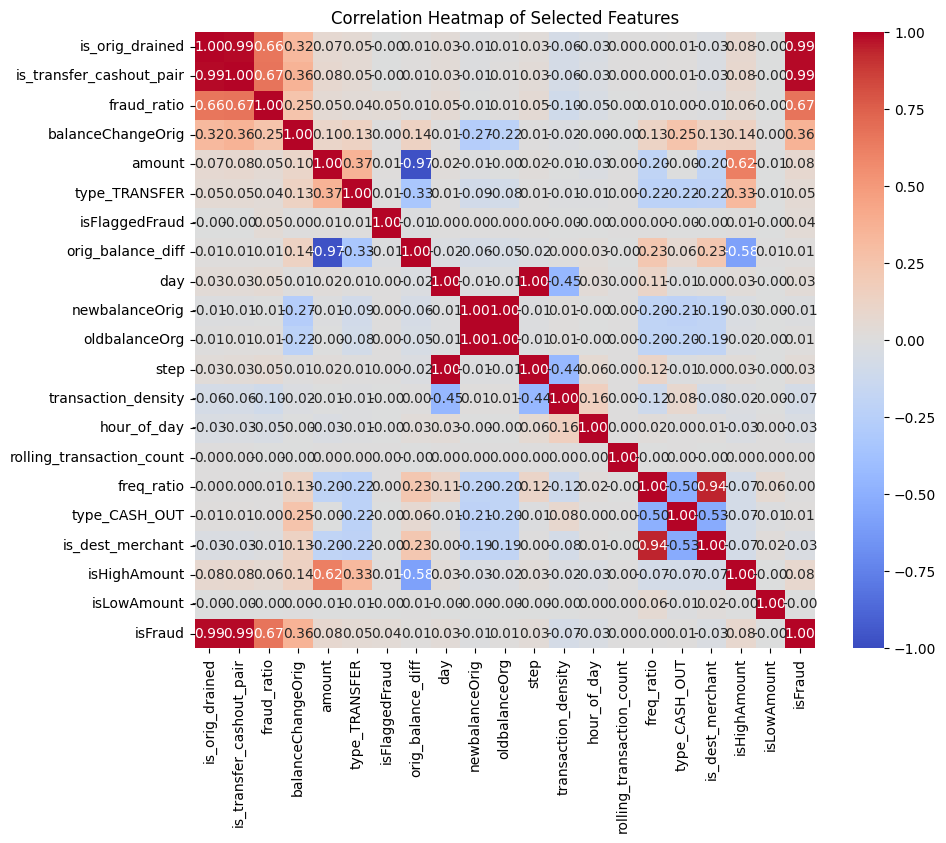

In [48]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

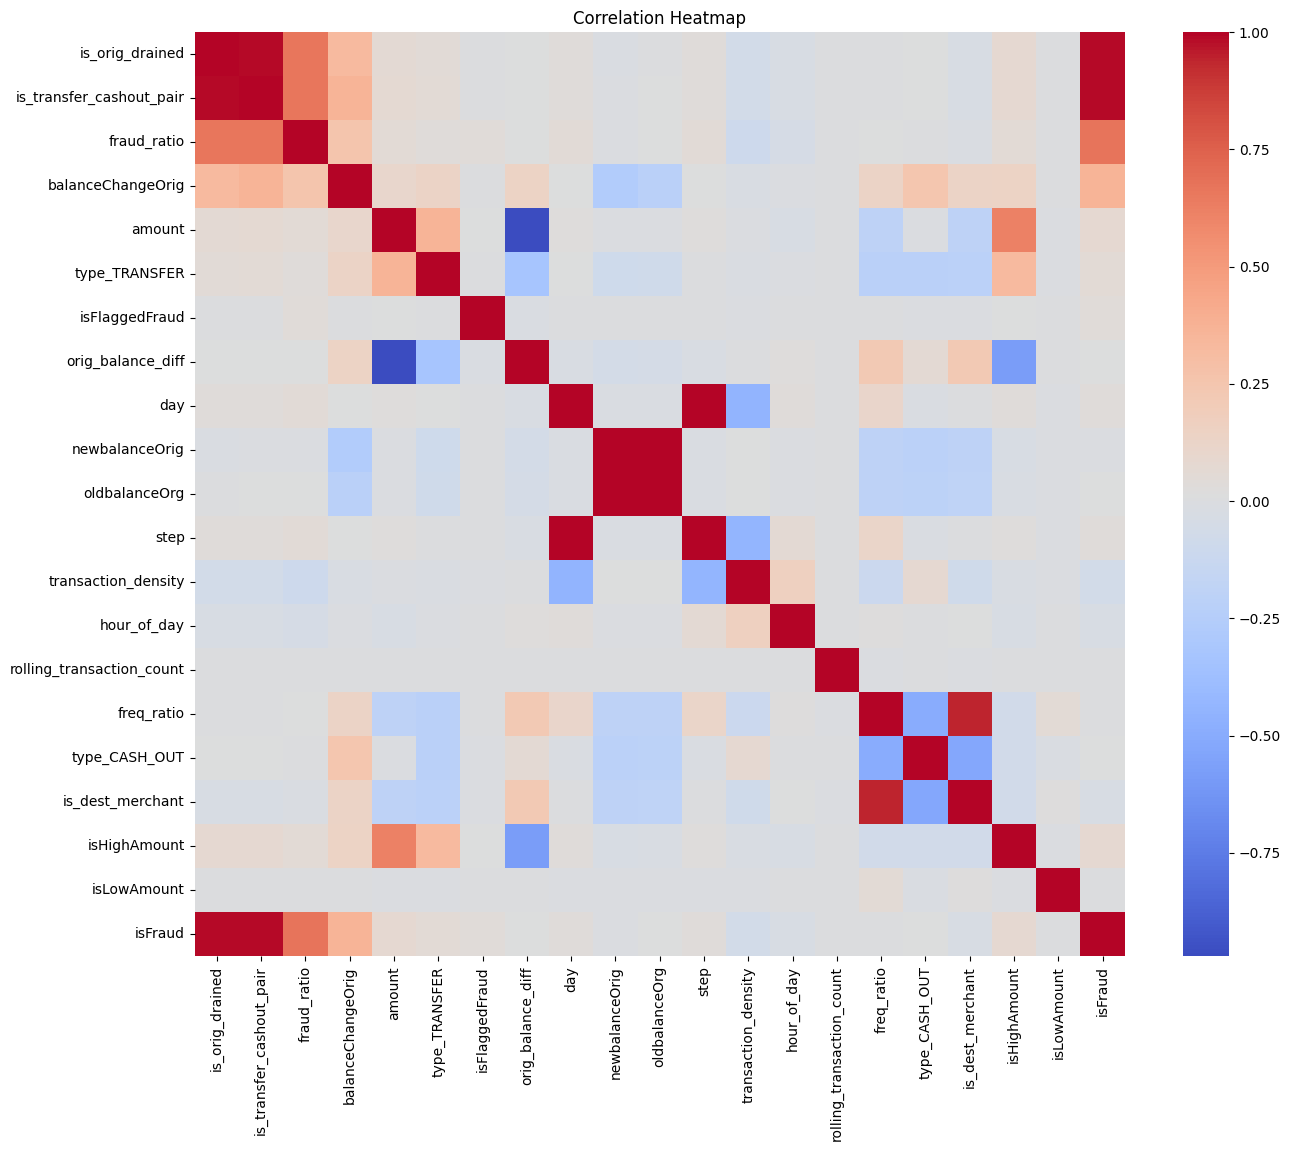

In [49]:
plt.figure(figsize=(15,12))
sns.heatmap(df_select.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [50]:
df_select

,is_orig_drained,is_transfer_cashout_pair,fraud_ratio,balanceChangeOrig,amount,type_TRANSFER,isFlaggedFraud,orig_balance_diff,day,newbalanceOrig,...,step,transaction_density,hour_of_day,rolling_transaction_count,freq_ratio,type_CASH_OUT,is_dest_merchant,isHighAmount,isLowAmount,isFraud
0,0,0,0.005908,6.42,6.42,0,0,-1.746159e-12,0,18456.36,...,1,2708,1,1.0,1.000000,0,1,0,0,0
1,0,0,0.005908,6.93,6.93,0,0,-6.984635e-12,0,68260.07,...,1,2708,1,2.0,1.000000,0,1,0,0,0
2,0,0,0.005908,8.73,8.73,0,0,-4.074963e-12,0,81304.27,...,1,2708,1,3.0,1.000000,0,1,0,0,0
3,0,0,0.005908,13.54,13.54,0,0,-2.764011e-12,0,16730.22,...,1,2708,1,4.0,1.000000,0,1,0,0,0
4,0,0,0.005908,15.06,15.06,0,0,-2.328804e-12,0,204666.94,...,1,2708,1,5.0,1.000000,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1,1,1.000000,850002.52,850002.52,0,0,0.000000e+00,30,0.00,...,743,8,23,10.0,0.035714,1,0,0,0,1
6362616,1,1,1.000000,1258818.82,1258818.82,1,0,0.000000e+00,30,0.00,...,743,8,23,10.0,1.000000,0,0,0,0,1
6362617,1,1,1.000000,1258818.82,1258818.82,0,0,0.000000e+00,30,0.00,...,743,8,23,10.0,0.166667,1,0,0,0,1
6362618,1,1,1.000000,6311409.28,6311409.28,1,0,0.000000e+00,30,0.00,...,743,8,23,10.0,1.000000,0,0,1,0,1


In [51]:

final_features = ['is_transfer_cashout_pair','fraud_ratio', 'transaction_density', 'hour_of_day', 'is_dest_merchant', 
                  'type_TRANSFER', 'balanceChangeOrig', 'isHighAmount' ]

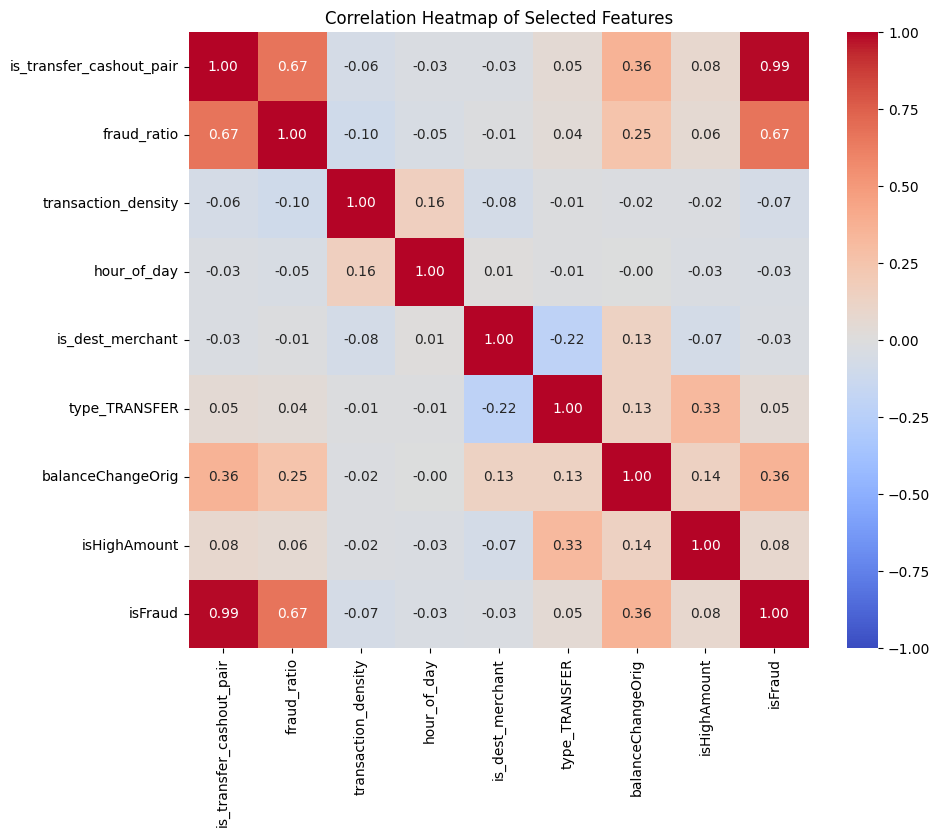

In [52]:
model_df = df[final_features + ['isFraud']]

correlation_matrix = model_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

# Baseline Fraud Detection Model



In [53]:
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = model_df.drop(columns=['isFraud'])
y = model_df['isFraud']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [54]:
import sys
print(sys.executable)
print(sys.version)

/Users/olaoluwatunmise/Payment-Under-Fraud-Detection/MM0004-falcon-eye/frauddetect/bin/python
3.13.2 (main, Feb  4 2025, 14:51:09) [Clang 16.0.0 (clang-1600.0.26.6)]


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE



# Intialize the model

rf_model = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5,random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced', # Handle class imbalance
        random_state=42
        ))
])

# Fit the model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
# Probabilities for the positive class (fraud)
y_pred_proba = rf_model.predict_proba(X_test)[:,1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {roc_auc:.4f}")

# AUC-PR (Precision-Recall curve)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr:.4f}")



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.90      1.00      0.95      2464

    accuracy                           1.00   1908786
   macro avg       0.95      1.00      0.97   1908786
weighted avg       1.00      1.00      1.00   1908786

AUC-ROC: 0.9977
AUC-PR: 0.6192


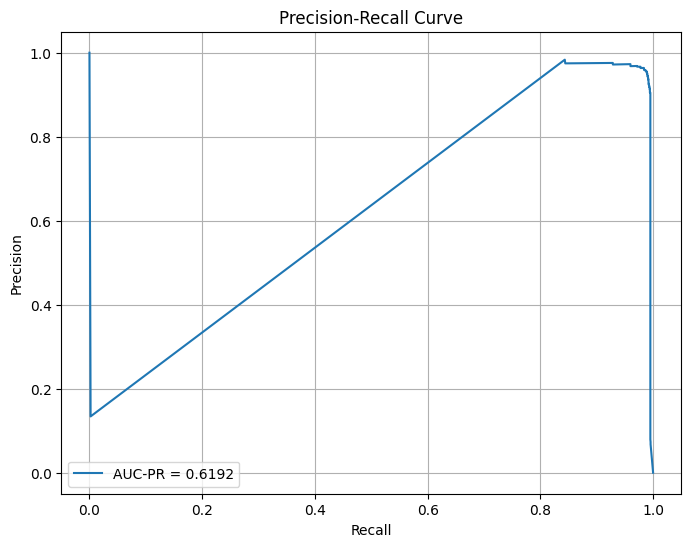

In [56]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


Feature Importance:
                    Feature  Importance
0  is_transfer_cashout_pair    0.456222
6         balanceChangeOrig    0.161727
1               fraud_ratio    0.145849
5             type_TRANSFER    0.138863
2       transaction_density    0.057776
4          is_dest_merchant    0.023819
3               hour_of_day    0.009048
7              isHighAmount    0.006696


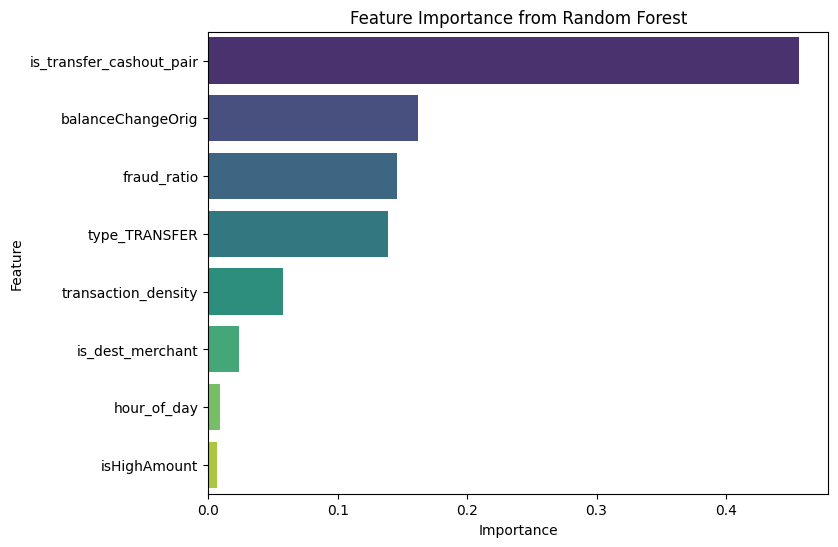

In [57]:


# Feature importance
feature_importance = pd.DataFrame({
    'Feature': final_features,
    'Importance': rf_model.named_steps['classifier'].feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_importance, palette='viridis', legend=False)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



### XGBoost

In [60]:
# from xgboost import XGBClassifier
# import xgboost as xgb

# model = xgb.XGBClassifier()



# xgb_model = Pipeline([
#     ('smote', SMOTE(sampling_strategy=0.5,random_state=42)),
#     ('classifier', XGBClassifier(
#         scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
#         random_state=42,
#         eval_metric='aucpr'
#     ))
# ])
# xgb_model.fit(X_train, y_train)
# y_pred = xgb_model.predict(X_test)
# y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
# print(classification_report(y_test, y_pred, zero_division=0))

In [61]:
import sklearn
print(sklearn.__version__)

1.6.1
